In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
csv_test=pd.read_csv('C:\\Users\\j7206\\Downloads\\labeled_tweet_data_2021-02-04.csv')

C:\Users\j7206\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [140]:
csv_test=csv_test[csv_test.name!='Elon Musk']

In [141]:
csv_test=csv_test[['created_at','likes_count','sentiment']]

In [142]:
csv_test=csv_test.loc[::-1].reset_index(drop=True)

In [143]:
csv_test[csv_test['created_at'].str.contains('07:56')]

,created_at,likes_count,sentiment
9663,2021-02-04 05:07:56+00:00,5.0,positive
9664,2021-02-04 05:07:56+00:00,4.0,positive
12305,2021-02-04 06:07:56+00:00,2.0,positive
17693,2021-02-04 07:56:00+00:00,4.0,positive
17694,2021-02-04 07:56:00+00:00,2.0,positive
...,...,...,...
74348,2021-02-04 17:07:56+00:00,0.0,positive
78322,2021-02-04 18:07:56+00:00,12.0,positive
81770,2021-02-04 19:07:56+00:00,0.0,positive
81771,2021-02-04 19:07:56+00:00,3.0,positive


In [144]:
csv_test=csv_test.replace('positive', 1)
csv_test=csv_test.replace('neutral', 0)
csv_test=csv_test.replace('negative', -1)


In [145]:
csv_test['created_at']=csv_test['created_at'].str.slice(11,19)

In [146]:
csv_test['created_at']=csv_test['created_at'].str.slice(0,5)

In [147]:
csv_test=csv_test.iloc[13795:17694]

In [149]:
csv_test=csv_test.loc[::-1].reset_index(drop=True)

In [150]:
csv_test['created_at'][0]

'07:15'

In [175]:
result=[]
time=[]

mean=0
for k in range(41):
    n=0
    x=0
    for i in range(3898):
        if csv_test['created_at'][i]=='07:%d' %(k+15):
            #x+=csv_test['sentiment'][i]
            #n+=1
            x+=csv_test['likes_count'][i]*csv_test['sentiment'][i]
            n+=csv_test['likes_count'][i]
    time.append(k)
    result.append(x/n)
    if k<20:
        mean+=x/n
mean=mean/20

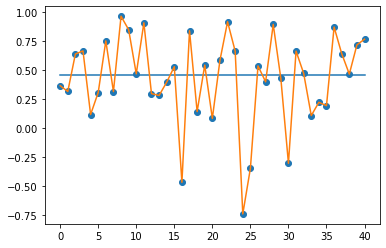

In [176]:
plt.scatter(time,result)
plt.plot([0,40],[mean,mean])
plt.plot(time,result)